In [16]:
import numpy as np
import matplotlib.pyplot as plt

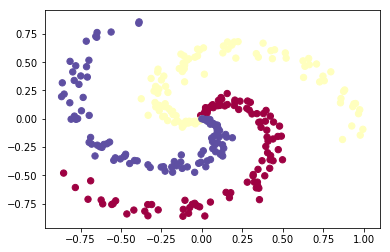

In [17]:
N = 100 # 每种类型的数据数
D = 2 # 纬度，这里是二维坐标点
K = 3 # 类型数
X = np.zeros((N*K,D)) # 数据，每一行为一个样本
y = np.zeros(N*K, dtype='uint8') # 数据的类型标签
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # 极坐标半径
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # 极坐标角度
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# 数据可视化:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [20]:
# 随机初始化参数
D = 2 #数据维度
K = 3 #分类的类型数
h = 1000 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))
X = np.zeros((h*K,D)) # 数据，每一行为一个样本
y = np.zeros(h*K, dtype='uint8') # 数据的类型标签

# 一些超参数
step_size = 1e-0
reg = 1e-3 # 正则化强度
print(X.shape)
print(y.shape)

(3000, 2)
(3000,)


In [ ]:
train_rate = 0.7
train_len = X.shape[0] * train_rate
X_train = X[0:train_len, :]
y_train = y[0:train_len, :]
X_val = X[train_len:, :]
y_val = y[train_len:, :]

In [ ]:
# 梯度下降循环
num_examples = X.shape[0]
for i in range(10000):
    # 计算类型得分scores, [N x K]
    hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
    scores = np.dot(hidden_layer, W2) + b2

    # 计算Softmax
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]

    # 计算损失: 交叉熵损失 和 正则化
    correct_logprobs = -np.log(probs[range(num_examples),y])
    data_loss = np.sum(correct_logprobs)/num_examples
    reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)  #所有层的正则化项的和
    loss = data_loss + reg_loss
    if i % 1000 == 0:
        print("iteration %d: loss %f" % (i, loss))

    # 计算scores的梯度
    dscores = probs
    dscores[range(num_examples),y] -= 1
    dscores /= num_examples

    # 反向传播计算参数梯度
    # W2和b2的梯度
    dW2 = np.dot(hidden_layer.T, dscores)
    db2 = np.sum(dscores, axis=0, keepdims=True)
    # 反向传播到隐层
    dhidden = np.dot(dscores, W2.T)
    # 计算ReLU的梯度
    dhidden[hidden_layer <= 0] = 0
    # 最后是W和b
    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)

    # 加上正则化项的梯度贡献
    dW2 += reg * W2
    dW += reg * W

    # 进行参数更新
    W += -step_size * dW
    b += -step_size * db
    W2 += -step_size * dW2
    b2 += -step_size * db2

In [ ]:
hidden_layer = np.maximum(0, np.dot(X_val, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print('training accuracy: %.2f' % (np.mean(predicted_class == y)))